In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
sns.set_theme(style="whitegrid")
pd.set_option('display.max_rows', None) 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from pyvis.network import Network
import networkx as nx
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import prince
from kmodes.kmodes import KModes
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import statsmodels.api as sm
import gensim
from gensim.utils import simple_preprocess
import missingno as msno
import pylab
import ptitprince

In [2]:
df = pd.read_csv('/Users/Alessandro_1/Documents/GitHub/Airplanes/Airmap.csv', parse_dates=[0], infer_datetime_format = True)

In [3]:
df.head(5)

,date,time,location,operator,route,ac_type,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary,city,country
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",Fort Myer,USA
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,Juvisy-sur-Orge,France
2,1912-07-12,630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Atlantic City,USA
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Victoria,Canada
4,1913-09-09,1830,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,Over the North Sea,Norway


In [4]:
# lens = []
# df.summary = df.summary.astype(str)
# for i in range(5008):
#     lens.append(len(df.summary[i]))

In [5]:
df = df.drop(columns = 'ground')

<AxesSubplot:>

<Figure size 500x500 with 0 Axes>

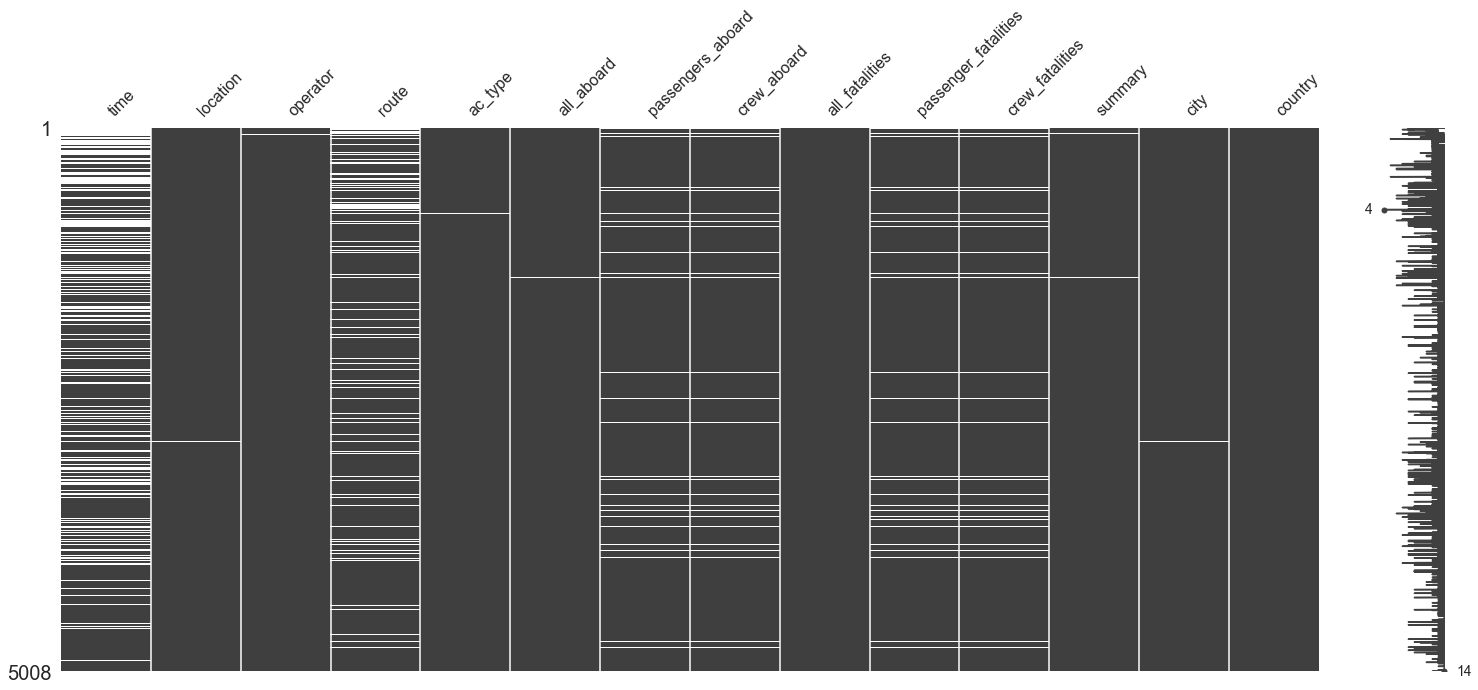

In [6]:
plt.figure(figsize=(10,10), dpi=50)
missingdata_df = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missingdata_df])

In [7]:
df2 = pd.read_csv('/Users/Alessandro_1/Documents/GitHub/Airplanes/all_flights.csv')

In [8]:
df2 = pd.DataFrame(df2.sum())
df2 = df2.rename(columns = {0: 'flights'}) 
df2.index = df2.index.astype(int)

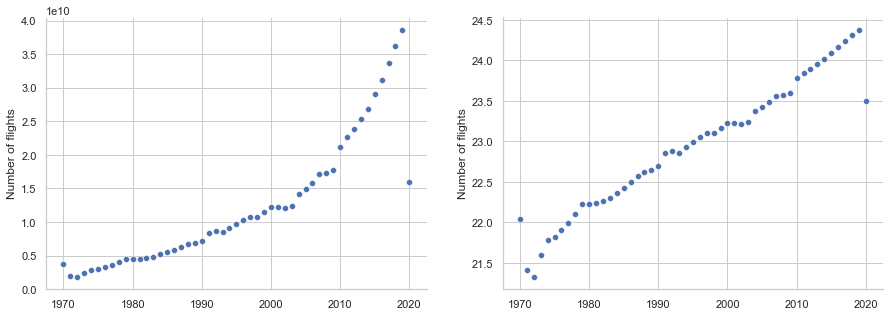

In [9]:
# sns.set_theme(style="white")
fig, ax = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x = df2.index, y = df2.flights, ax = ax[0]);
sns.scatterplot(x = df2.index, y = np.log(df2.flights), ax = ax[1]);
ax[0].set_ylabel('Number of flights')
ax[1].set_ylabel('Number of flights')
sns.despine()
# fig.suptitle('Number of flights vs. logged number of flights', fontweight = 'bold');
# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16);

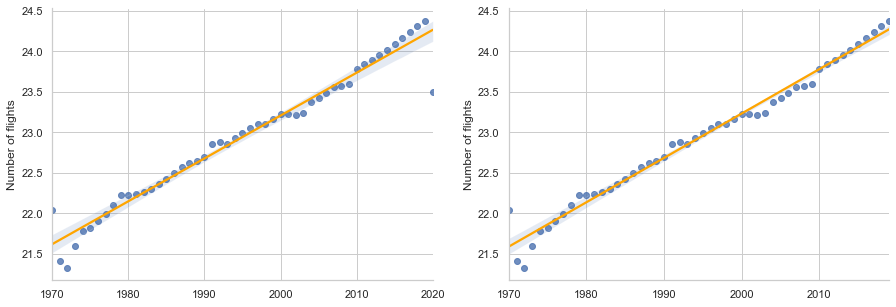

In [10]:
fig, ax = plt.subplots(1, 2,figsize=(15,5))
sns.regplot(x = df2.index, y = np.log(df2.flights), ax = ax[0]);
df2 = df2.drop(2020)
sns.regplot(x = df2.index, y = np.log(df2.flights), ax = ax[1]);
ax[0].set_ylabel('Number of flights')
ax[1].set_ylabel('Number of flights')
regline = ax[0].get_lines()[0]
regline.set_color('orange')
regline = ax[1].get_lines()[0]
regline.set_color('orange')
sns.despine()
# fig.suptitle('Linear regression with 2020 vs. linear regression without 2020', fontweight = 'bold');

In [11]:
dates = []
fat = []
i = 0
while i < 62:
    i +=1
    dates.append(1907 + i)
    fat.append(np.nan)

In [12]:
early_dates = pd.DataFrame( {'flights': fat}, index = dates,)
early_dates.index = early_dates.index.astype(int)

In [13]:
early_dates.head()

,flights
1908,NaN
1909,NaN
1910,NaN
1911,NaN
1912,NaN


In [14]:
df2.index = df2.index.astype(int)

In [15]:
X = df2.index.values
X = X.reshape(-1, 1)
y = np.log(df2.flights).values
y = y.reshape(-1, 1)
p = early_dates.index.values
p = p.reshape(-1, 1)
reg = LinearRegression(fit_intercept=True).fit(X, y)
pred = reg.predict(p)

In [16]:
# mod = sm.OLS(X, y)
# res = mod.fit()
# res.predict(early_dates.index.values)

In [17]:
early_dates['flights'] = pred

In [18]:
df2['flights'] = np.log(df2.flights)

In [19]:
df3 = early_dates.append(df2)

In [20]:
df3.index = df3.index.astype(int)

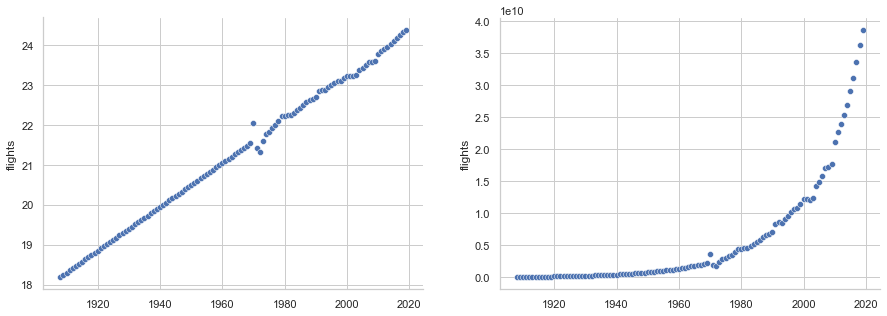

In [21]:
fig, ax = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x = df3.index, y = df3.flights, ax = ax[0]);
sns.scatterplot(x = df3.index, y = np.exp(df3.flights), ax = ax[1]);
sns.despine()
# plt.xlabel('Date', fontsize = 15)
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# plt.ylabel('Number of flights', fontsize = 15)
# plt.legend(fontsize = 15);
plt.rcParams.update({'axes.titlesize': 'medium'})
plt.rcParams.update({'axes.labelsize': 'medium'})

In [22]:
df3['type'] = "Estimated"
df3.loc[1969:2020]['type'] = 'Actual'
df3.loc[2020] = [np.log(1.600550e+10), 'Actual'] 
df3.head()

,flights,type
1908,18.194126,Estimated
1909,18.248901,Estimated
1910,18.303676,Estimated
1911,18.358451,Estimated
1912,18.413226,Estimated


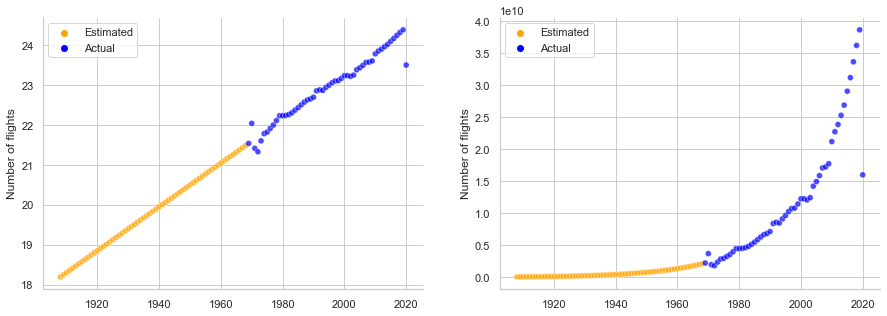

In [23]:
fig, ax = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x = df3.index.values, y = df3.flights, hue = df3.type, ax = ax[0], palette = ['orange', 'blue'], alpha = 0.7);
sns.scatterplot(x = df3.index.values, y = np.exp(df3.flights), hue = df3.type, ax = ax[1], palette = ['orange', 'blue'], alpha = 0.7);
ax[0].legend(title = []);
ax[1].legend(title = []);
ax[0].set_ylabel('Number of flights')
ax[1].set_ylabel('Number of flights')
sns.despine()
# fig.suptitle('Estimated logged number of flights vs. estimated number of flights', fontweight = 'bold');
plt.rcParams.update({'axes.titlesize': 'small'})
plt.rcParams.update({'axes.labelsize': 'medium'})

In [24]:
df.head(5)

,date,time,location,operator,route,ac_type,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,summary,city,country
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Fort Myer,USA
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,Juvisy-sur-Orge,France
2,1912-07-12,630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,Atlantic City,USA
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,The first fatal airplane accident in Canada oc...,Victoria,Canada
4,1913-09-09,1830,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,The airship flew into a thunderstorm and encou...,Over the North Sea,Norway


In [25]:
# df.date = pd.to_datetime(df.date, yearfirst=True)

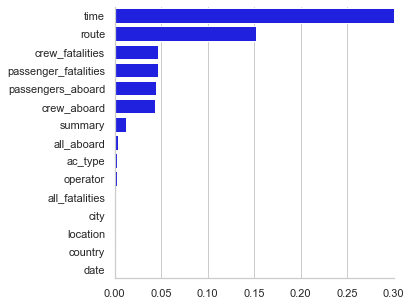

In [26]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x = df.isna().sum().sort_values(ascending = False).values/df.shape[0], y = df.isna().sum().sort_values(ascending = False).index, color = 'blue'), ;
ax.set_xlim(0,0.3)
sns.despine()

In [27]:
df.country = df.country.str.strip(' ')
df.loc[df.country == 'Australila', 'country'] = 'Australia'
df.loc[df.country == 'Phillipines','country'] = 'Philipines'
df.loc[df.country == 'United Kingdom', 'country'] = 'UK'

In [28]:
def time_manipulation(string):

    string = str(string).strip("c",)
    string = str(string).strip("Z",)
    string = str(string).strip(":",)

    if (len(str(string)) == 3):
        if str(string) != 'nan':
            string = str(0) + str(string)
    if (len(str(string)) == 2):
         string = str(string) + str(00)
    if (len(str(string)) == 1):
         string = str(0) + str(string) + str(00)

    if (len(str(string)) == 4):
        string = str(string[0:2]) + ":" + str(string[2:5])

    if (len(str(string)) == 3):
         string = np.nan

    return string

In [29]:
df.time = df.time.apply(time_manipulation)

In [30]:
df.ac_type.value_counts();

In [31]:
def aircraft_manipulation(string):

    string = str(string)
    string = string.split(" ")[0]

    if string == 'de':
         string = 'De Havilland'

    if string == 'De':
        string = 'De Havilland'

    if string == 'deHavilland':
        string = 'De Havilland'

    return string

In [32]:
df.ac_type = df.ac_type.apply(aircraft_manipulation)

In [33]:
string = []
for i in np.arange(len(df.operator)):
     string.append(str(df.operator[i]).split(" ")[0])

In [34]:
df.head()

,date,time,location,operator,route,ac_type,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,summary,city,country
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright,2.0,1.0,1.0,1.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Fort Myer,USA
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright,1.0,0.0,1.0,1.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,Juvisy-sur-Orge,France
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,Atlantic City,USA
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss,1.0,0.0,1.0,1.0,0.0,1.0,The first fatal airplane accident in Canada oc...,Victoria,Canada
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin,20.0,NaN,NaN,14.0,NaN,NaN,The airship flew into a thunderstorm and encou...,Over the North Sea,Norway


In [35]:
df['operator_summary'] = string

In [36]:
df['operator_summary'].loc[df['operator_summary'] != "Military"] = 'Domestic'

In [37]:
mil_index = df.ac_type[df.ac_type == 'Mil'].index

In [38]:
df.operator_summary[mil_index] = "Military"

In [39]:
grouped = df.groupby('country')['all_fatalities'].sum()

In [40]:
df['cluster'] = np.nan
for i in np.arange(len(grouped)): 
    cl = 0
    if grouped[i] < 500:
        cl = 1
    if grouped[i] >= 500 and grouped[i] < 1500:
        cl = 2
    if grouped[i] >= 1500 and grouped[i] < 5000:
        cl = 3
    if grouped[i] >= 5000 and grouped[i] < 10000:
        cl = 4
    if grouped[i] >= 10000:
        cl = 5
    df.loc[df.country == grouped.index[i], 'cluster'] = cl

In [41]:
grouped = grouped.reset_index();

In [42]:
grouped['numeric'] = grouped.index.values

In [43]:
grouped.head()

,country,all_fatalities,numeric
0,Afghanistan,1248.0,0
1,Albania,33.0,1
2,Algeria,964.0,2
3,Angola,861.0,3
4,Argentina,880.0,4


In [44]:
X = grouped[['numeric','all_fatalities']].to_numpy()

In [45]:
np.isnan(X);

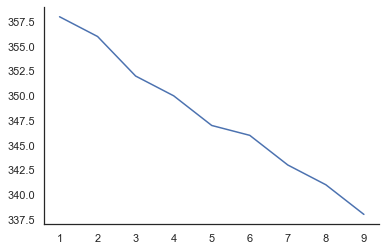

In [46]:
sns.set_theme(style="white")
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 3, verbose=0)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
x = np.array([i for i in range(1,10,1)])
sns.lineplot(x = x, y = cost);
sns.despine()

In [47]:
df['color'] = np.nan
for i in np.arange(len(df)): 
    col = 0
    if df.cluster[i] == 1:
        col = '#ffff00'
    if df.cluster[i] == 2:
        col = '#e6e600'
    if df.cluster[i] == 3:
        col = '#ffcc00'
    if df.cluster[i] == 4:
        col = '#ff9900'
    if df.cluster[i] == 5:
        col = '#ff3300'
    df.loc[df.cluster == df.cluster[i], 'color'] = col

In [48]:
# missing = df.isna().sum().sort_values(ascending=False)
# fig, ax = plt.subplots(figsize = (10,10))
# sns.barplot(x = missing.values/df.shape[0], y = missing.index, palette="Blues_d" );

From the above plot we can see that all_fatalities and all_aboard and operator_summary are better features than the more detailed ones

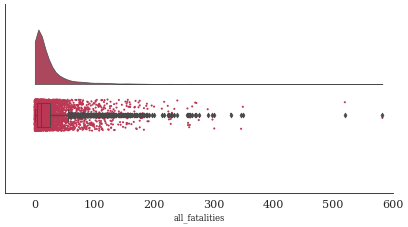

In [53]:
sns.set_theme(style="white")
pylab.rcParams.update({'font.size': 15, 'font.family': 'serif'})
fig = plt.figure(figsize=(10,5), dpi=50)
hue_mask =False
ptitprince.RainCloud(data = df, y = 'all_fatalities', orient = 'h', palette = 'inferno')

# plt.xlabel(fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 14);
plt.xlim(-50, 600)

sns.despine()
plt.show()

In [54]:
df.time.loc[df.time == "9::15"] = "09:15"
df.time.loc[df.time == "06;15"] = "06:15"

In [55]:
hour = []
for i in np.arange(len(df.time)):
    hour.append(str(df.time[i])[0:2])

In [56]:
df['hour'] = hour

In [57]:
df = df.set_index('date')

In [58]:
df['id'] = 1

In [59]:
domestic = df[df.operator_summary == 'Domestic']
military = df[df.operator_summary == 'Military']

In [60]:
dom_fat_by_year = domestic.resample('Y')['id'].count()
mil_fat_by_year = military.resample('Y')['id'].count()

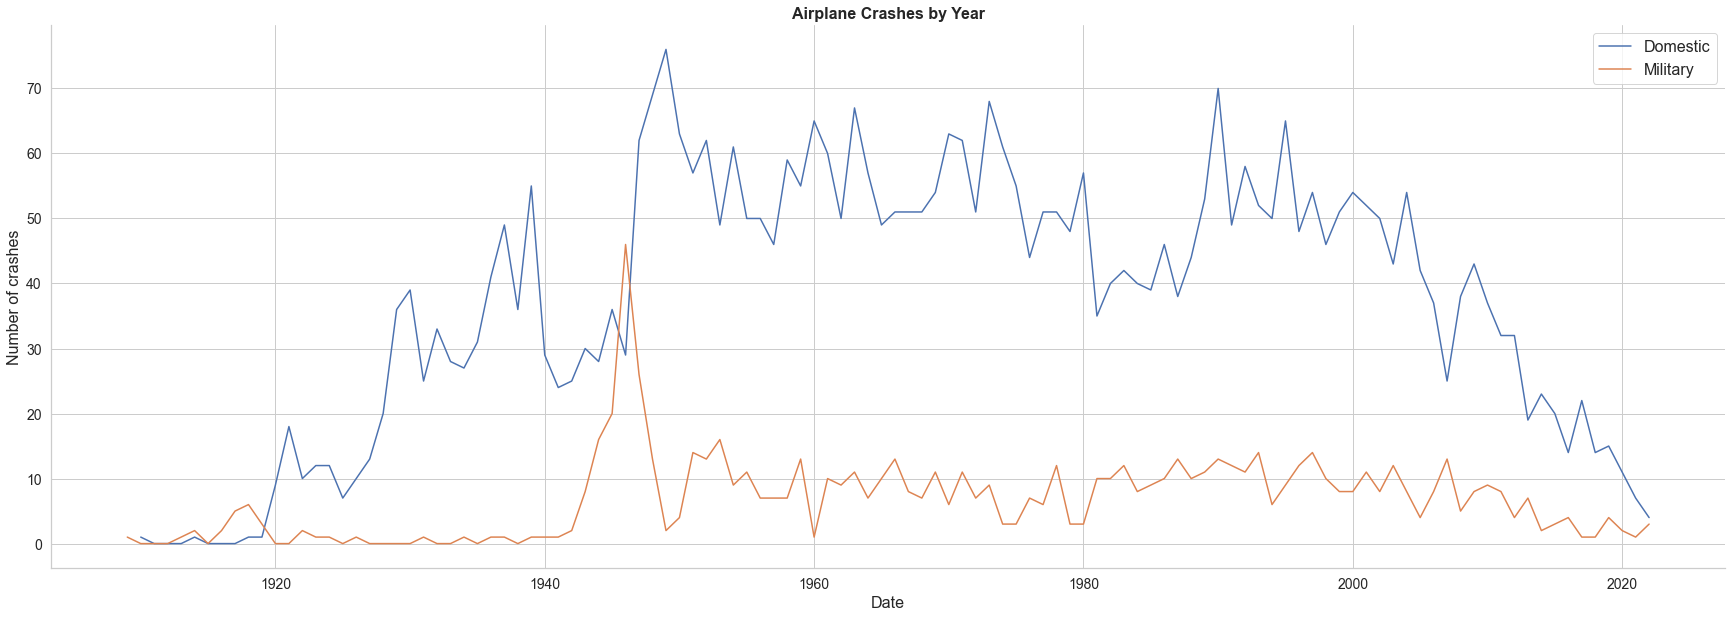

In [61]:
sns.set_theme(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (30,10));
sns.lineplot(x = dom_fat_by_year.index, y = dom_fat_by_year.values, label = "Domestic")
sns.lineplot(x = mil_fat_by_year.index, y = mil_fat_by_year.values, label = "Military")
plt.title("Airplane Crashes by Year", fontweight = 'bold', fontsize = 16)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Number of crashes', fontsize = 16)
plt.legend(fontsize = 16);
sns.despine()


In [62]:
dom_fat_by_hour = domestic.groupby('hour')['id'].count()
dom_fat_by_hour= dom_fat_by_hour.drop([' 2', 'na'])
mil_fat_by_hour = military.groupby('hour')['id'].count()
mil_fat_by_hour= mil_fat_by_hour.drop(['na'])

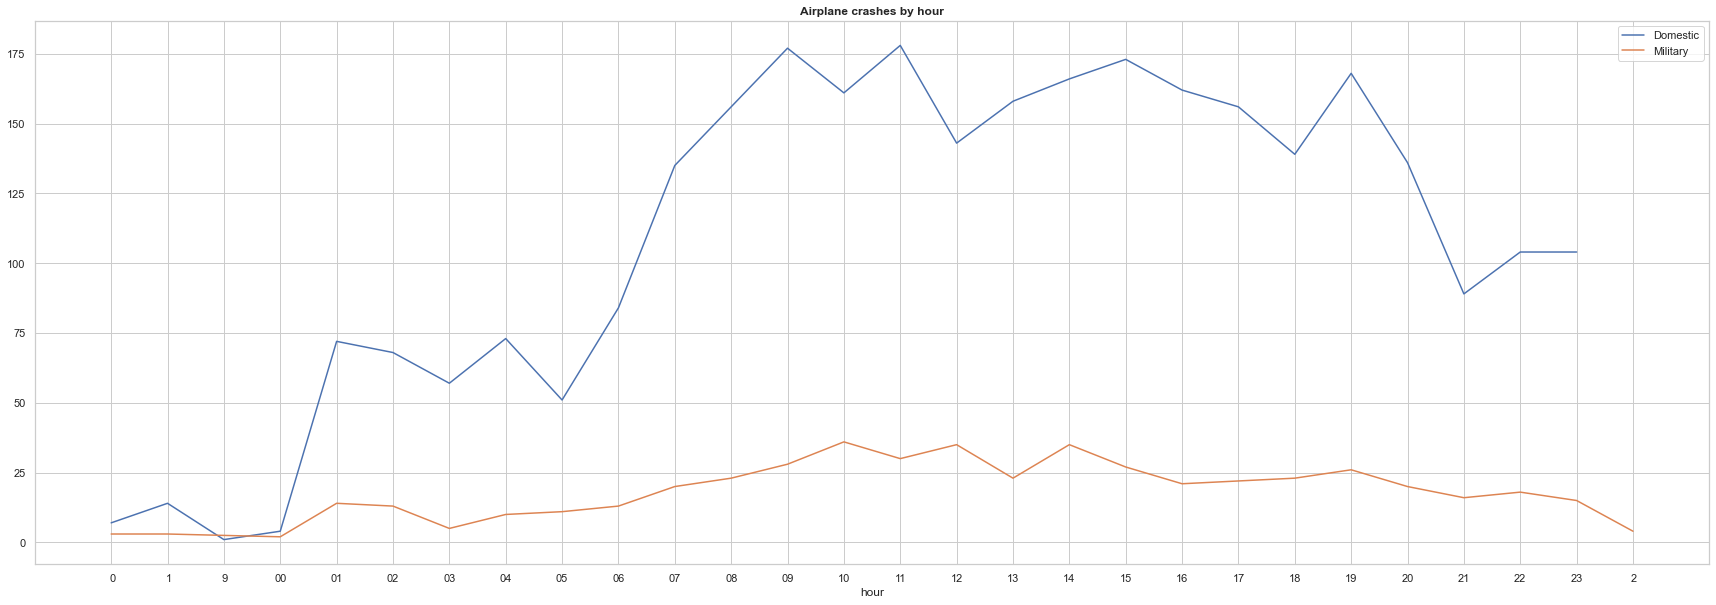

In [63]:
fig, ax = plt.subplots( figsize = (30,10));
sns.lineplot(x = dom_fat_by_hour.index, y = dom_fat_by_hour.values, label = "Domestic")
sns.lineplot(x = mil_fat_by_hour.index, y = mil_fat_by_hour.values, label = "Military")
plt.title("Airplane crashes by hour", fontweight = 'bold')
plt.legend();             

"0 is not an error, there are only 6 crashes recorded at that time"

In [64]:
dom_vic_by_year = domestic.resample('Y')['all_fatalities'].sum()
mil_vic_by_year = military.resample('Y')['all_fatalities'].sum()

In [65]:
dom_vic_by_year = dom_vic_by_year.iloc[0:112]

In [66]:
df3 = df3.drop(1908)

In [67]:
df3['rel_fatalities'] = dom_vic_by_year.values/np.exp(df3.flights)

In [68]:
df3.head()
df.index[2450]

Timestamp('1969-12-22 00:00:00')

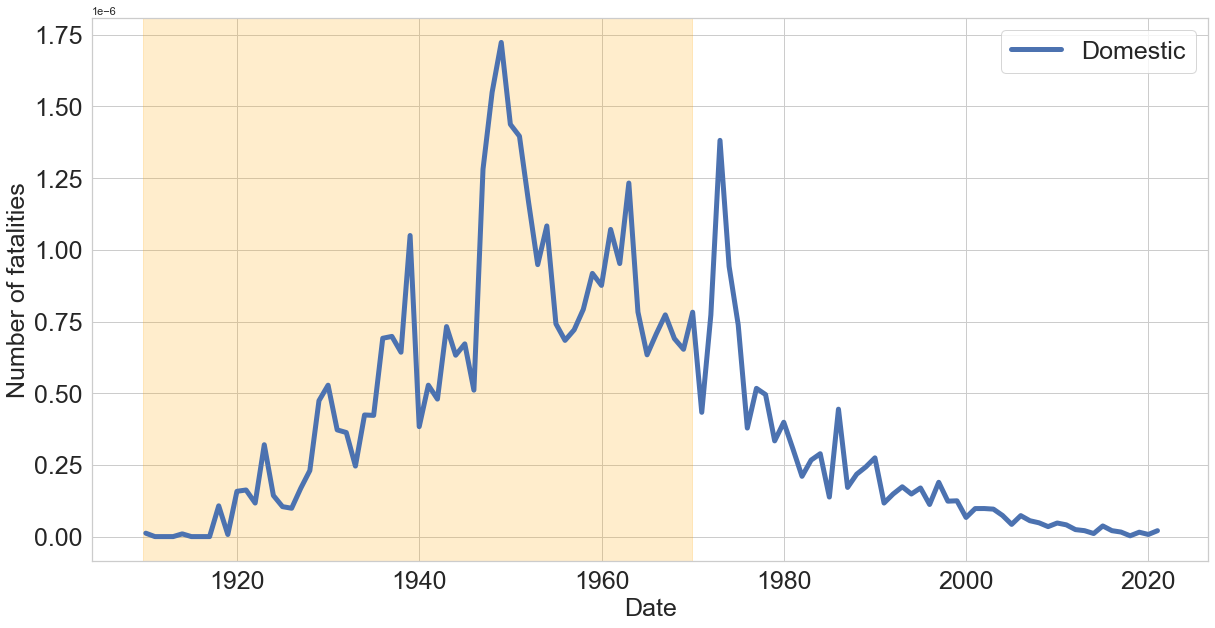

In [69]:
fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(x = dom_vic_by_year.index, y = df3['rel_fatalities'], label = "Domestic", linewidth=5)
# plt.axvline(x=1970)
# plt.title("Number of fatalities per flight by year", fontweight = 'bold', fontsize = 25)
plt.xlabel('Date', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel('Number of fatalities', fontsize = 25)
plt.legend(fontsize = 25);
ax.axvspan(df.index[1], df.index[2450], alpha=0.2, color='orange')
# ax.fill_between(dom_vic_by_year.index, y = 1920, y1 = 1960 )

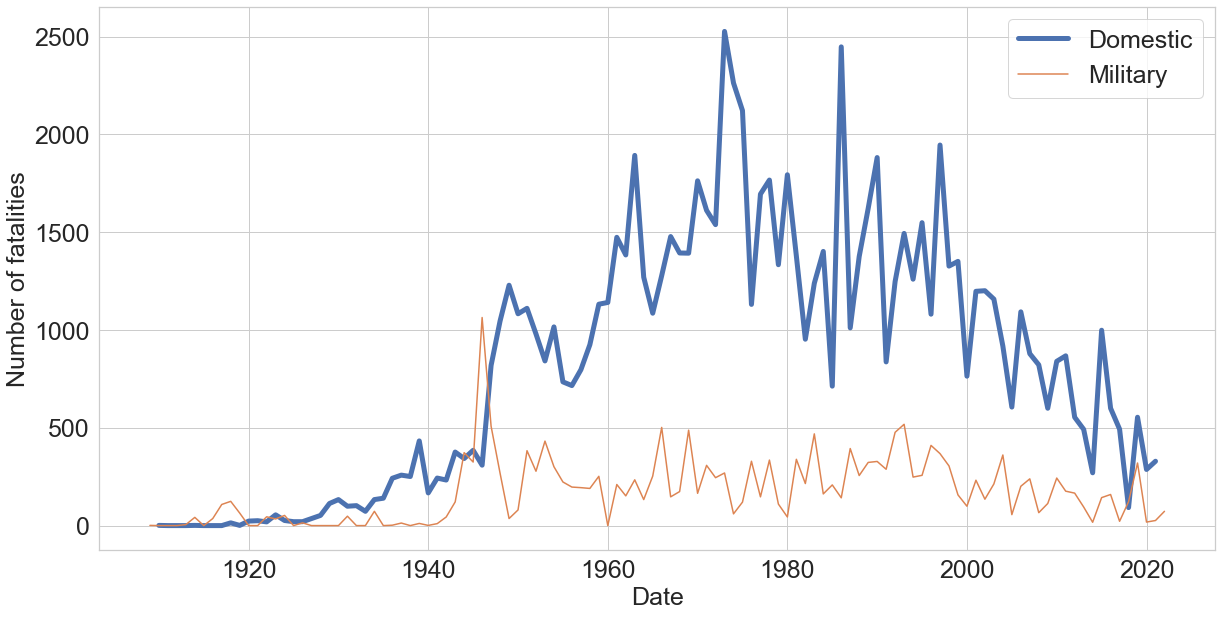

In [70]:
fig, ax = plt.subplots( figsize = (20,10))
sns.lineplot(x = dom_vic_by_year.index, y = dom_vic_by_year.values, label = "Domestic", linewidth=5)
sns.lineplot(x = mil_vic_by_year.index, y = mil_vic_by_year.values, label = "Military")
# plt.title("Number of total fatalities by year", fontweight = 'bold', fontsize =25)
plt.xlabel('Date', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel('Number of fatalities', fontsize = 25)
plt.legend(fontsize = 25);

In [71]:
dom_vic_by_hour = domestic.groupby('hour')['all_fatalities'].sum()
dom_vic_by_hour= dom_vic_by_hour.drop([' 2', 'na'])
mil_vic_by_hour = military.groupby('hour')['all_fatalities'].sum()
mil_vic_by_hour= mil_vic_by_hour.drop(['na'])

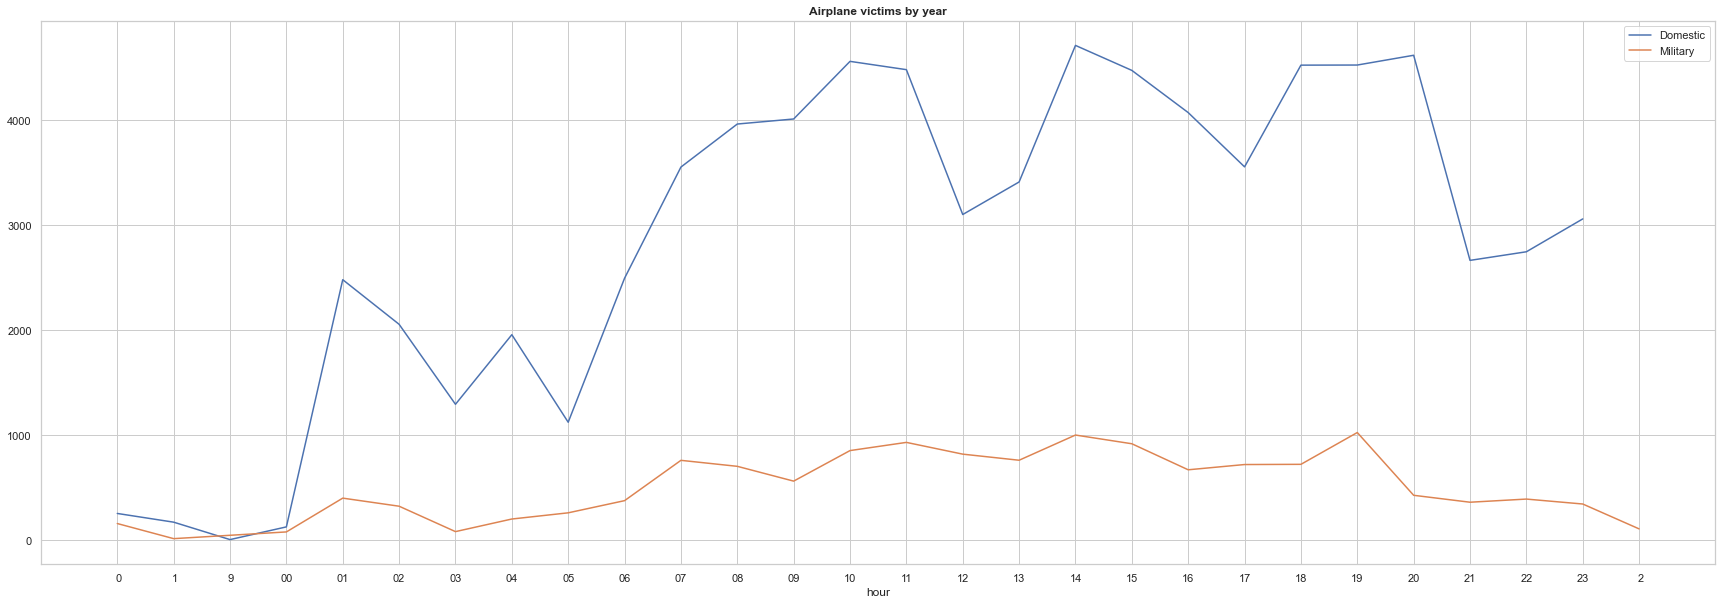

In [72]:
fig, ax = plt.subplots( figsize = (30,10))
sns.lineplot(x = dom_vic_by_hour.index, y = dom_vic_by_hour.values, label = "Domestic")
sns.lineplot(x = mil_vic_by_hour.index, y = mil_vic_by_hour.values, label = "Military")
plt.title("Airplane victims by year", fontweight = 'bold')
plt.legend();

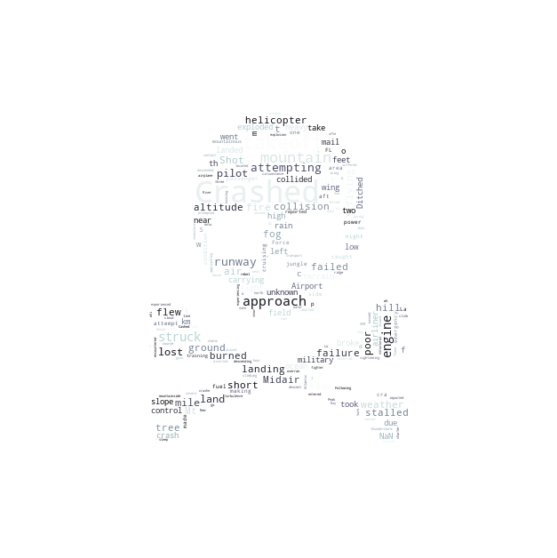

In [73]:
text = "".join(str(df.summary))
text = text.replace("taking", "takeoff")
skull_mask = np.array(Image.open('skull2.jpeg'))
stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')
stopwords.add("De")
stopwords.add('en')
stopwords.add('ft')
stopwords.add('route')
stopwords.add('crew')
stopwords.add('flight') 
stopwords.add('minutes')
stopwords.add('shortly')
stopwords.add('cargo')
wc = WordCloud(width=1000, height=800, background_color="white",colormap="bone", max_words=1000, mask=skull_mask, stopwords=stopwords, collocations=False)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

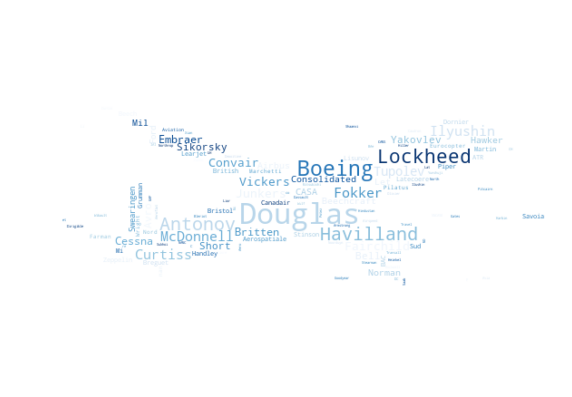

In [74]:
text = " ".join(df.ac_type.tolist())
text = text.replace('HavillandDe', 'Havilland')
plane_mask = np.array(Image.open('airplane.jpeg'))
stopwords = set(STOPWORDS)
stopwords.add("De")
wc = WordCloud(background_color="white", max_words=1000, colormap="Blues", mask=plane_mask, stopwords=stopwords, collocations=False)
wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [75]:
import gensim.corpora as corpora
# id2word = corpora.Dictionary(text)
text = text.split(" ")

In [76]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['short', 'due','shortly','from', 'subject', 're', 'edu', 'use', 'aircraft', 'crashed', 'plane', 'en', 'crew', 'flight'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.summary.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Alessandro_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['demonstration', 'army', 'flyer', 'flown', 'orville', 'wright', 'nose', 'dived', 'ground', 'height', 'approximately', 'feet', 'killing', 'lt', 'thomas', 'selfridge', 'passenger', 'first', 'recorded', 'airplane', 'fatality', 'history', 'one', 'two', 'propellers', 'separated', 'tearing', 'loose', 'wires', 'bracing']


In [77]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


In [78]:
from pprint import pprint
# number of topics
num_topics = 7
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                      per_word_topics = True,
                                      )
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus];

[(0,
  '0.013*"runway" + 0.013*"pilot" + 0.012*"engine" + 0.011*"land" + '
  '0.010*"approach" + 0.010*"airport" + 0.009*"failure" + 0.007*"weather" + '
  '0.007*"landing" + 0.006*"conditions"'),
 (1,
  '0.014*"engine" + 0.013*"failure" + 0.011*"taking" + 0.009*"altitude" + '
  '0.009*"control" + 0.008*"lost" + 0.008*"airport" + 0.007*"approach" + '
  '0.007*"landing" + 0.007*"fire"'),
 (2,
  '0.017*"pilot" + 0.011*"weather" + 0.010*"landing" + 0.010*"poor" + '
  '0.009*"ground" + 0.009*"airport" + 0.008*"ft" + 0.008*"runway" + '
  '0.007*"conditions" + 0.007*"attempting"'),
 (3,
  '0.018*"engine" + 0.010*"failure" + 0.009*"cargo" + 0.009*"approach" + '
  '0.009*"mountain" + 0.008*"runway" + 0.008*"struck" + 0.008*"altitude" + '
  '0.007*"takeoff" + 0.007*"pilot"'),
 (4,
  '0.018*"pilot" + 0.014*"approach" + 0.011*"engine" + 0.010*"runway" + '
  '0.010*"failure" + 0.009*"left" + 0.008*"altitude" + 0.007*"landing" + '
  '0.006*"airport" + 0.006*"fuel"'),
 (5,
  '0.018*"runway" + 0.013*"

In [79]:
import pyLDAvis
import os
import pickle

In [80]:
import pyLDAvis.gensim_models

In [81]:
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if True:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)
# pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.010654 -0.018394       1        1  19.825655
1     -0.049113 -0.004677       2        1  18.422069
2      0.014453 -0.004625       3        1  14.393315
5      0.046718 -0.012287       4        1  14.108965
3     -0.011870  0.004402       5        1  12.155426
6      0.006193  0.060097       6        1  11.786157
0      0.004272 -0.024517       7        1   9.308413, topic_info=                Term         Freq        Total Category  logprob  loglift
93            engine   925.000000   925.000000  Default  30.0000  30.0000
270           runway   937.000000   937.000000  Default  29.0000  29.0000
110             land   514.000000   514.000000  Default  28.0000  28.0000
53             pilot  1113.000000  1113.000000  Default  27.0000  27.0000
182              fog   305.000000   305.000000  Default  26.0000  26.0000
202          weather   563.000000   563.000000  Default  25.0000  25.0000
229            route   402.000000   402.000000  Default  24.0000  24.0000
107       attempting   429.000000   429.000000  Default  23.0000  23.0000
188       conditions   483.000000   483.000000  Default  22.0000  22.0000
130           struck   472.000000   472.000000  Default  21.0000  21.0000
212             poor   369.000000   369.000000  Default  20.0000  20.0000
16            ground   487.000000   487.000000  Default  19.0000  19.0000
298          airport   708.000000   708.000000  Default  18.0000  18.0000
59                ft   360.000000   360.000000  Default  17.0000  17.0000
179         approach   897.000000   897.000000  Default  16.0000  16.0000
220          failure   781.000000   781.000000  Default  15.0000  15.0000
86               sea   239.000000   239.000000  Default  14.0000  14.0000
237         mountain   466.000000   466.000000  Default  13.0000  13.0000
1155             vfr   135.000000   135.000000  Default  12.0000  12.0000
223             fuel   319.000000   319.000000  Default  11.0000  11.0000
224            cargo   480.000000   480.000000  Default  10.0000  10.0000
440               km   172.000000   172.000000  Default   9.0000   9.0000
910            icing   136.000000   136.000000  Default   8.0000   8.0000
430            stall   120.000000   120.000000  Default   7.0000   7.0000
221           taking   548.000000   548.000000  Default   6.0000   6.0000
807             left   376.000000   376.000000  Default   5.0000   5.0000
78              flew   165.000000   165.000000  Default   4.0000   4.0000
232              low   290.000000   290.000000  Default   3.0000   3.0000
256          takeoff   484.000000   484.000000  Default   2.0000   2.0000
178              nan    57.000000    57.000000  Default   1.0000   1.0000
7204            beta     4.183477     5.060557   Topic1  -8.3870   1.4279
7012              pt     4.806984     6.007778   Topic1  -8.2481   1.3952
5438              pa     3.877676     5.011160   Topic1  -8.4629   1.3618
5370    sufficiently     3.781999     4.988311   Topic1  -8.4879   1.3413
7269             abu     2.246609     2.990960   Topic1  -9.0088   1.3320
2308           holes     2.246058     2.990433   Topic1  -9.0090   1.3320
7270           dhabi     2.245789     2.990189   Topic1  -9.0091   1.3319
4688          wobble     2.245775     2.990182   Topic1  -9.0091   1.3319
7011             gkl     2.245680     2.990113   Topic1  -9.0092   1.3319
7010             gjz     2.245645     2.990107   Topic1  -9.0092   1.3319
2529           milne     2.245037     2.989997   Topic1  -9.0095   1.3316
5331          reeves     2.219545     2.987064   Topic1  -9.0209   1.3212
6715      acceptable     2.215481     2.984848   Topic1  -9.0227   1.3201
5096           brief     2.950083     3.979950   Topic1  -8.7364   1.3188
7306        ignoring     2.190879     2.978780   Topic1  -9.0339   1.3110
4205         capsule     2.184873     2.976741   Topic1  -9.0366   

In [91]:
list_df = []
for country in df.country.unique():
    stop = ['left', 'miles', 'during', 'flight', 'crew', 'aircraft', 'plane', 'crashed', 'which', 'that', '','en', 'when' , 'it','a', 'were','not', 'for', 'the', 'of', 'and', 'to', 'a', 'in', 'was', 'The', ' The ', 'The  ', 'into', "'The", 'after', 'on', 'an', 'from', 'at', 'while', 'by', 'with', 'off', 'The ', "'The "]
    c_df = df.loc[df.country == country]
    text = [string for string in c_df.summary]
    text = "".join(str(text))
    text = text.split(' ');
    text = [string.lower() for string in text]
    text = [string.replace("'", "") for string in text]
    text = [string.replace("taking", "taking-off") for string in text]
    text = [string.strip(" ") for string in text]
    text = [string.strip("'") for string in text]
    text = [string for string in text if not string in stop]
    temp = pd.DataFrame(pd.Series(text).value_counts()[0:5])
    temp['country'] = country
    temp = temp.reset_index()
    temp = temp.rename({'index' : 'cause', 0: 'weight'}, axis = 1)
    temp['cause'] = temp['cause'].str.upper()
    list_df.append(temp)

In [92]:
all_df = pd.concat(list_df)
all_df.head()
all_df = all_df.dropna()

In [93]:
got_net = Network(height='750px', width='100%', bgcolor='white', font_color='black', notebook=True)

# set the physics layout of the network
got_net.barnes_hut()


sources = all_df['country']
cause = all_df['cause']
weights = all_df['weight']

edge_data = zip(sources, cause, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    

    got_net.add_node(src, src, title=src, size = w)
    got_net.add_node(dst, dst, title=dst, size = w)
    got_net.add_edge(src, dst, value=w, size = w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += '<br>' ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show('mynet.html')

In [94]:
list_df = []
for cluster in df.cluster.unique():
    stop = ['due','below', 'poor','shortly', 'altitude', 'cargo','attempting', '"the','left', 'miles', 'during', 'flight', 'crew','aircraft', 'plane', 'crashed', 'which', 'that', '','en', 'when' , 'it','a', 'were','not', 'for', 'the', 'of', 'and', 'to', 'a', 'in', 'was', 'The', ' The ', 'The  ', 'into', "'The", 'after', 'on', 'an', 'from', 'at', 'while', 'by', 'with', 'off', 'The ', "'The "]
    c_df = df.loc[df.cluster == cluster]
    text = [string for string in c_df.summary]
    text = "".join(str(text))
    text = text.split(' ');
    text = [string.lower() for string in text]
    text = [string.replace("'", "") for string in text]
    text = [string.replace("taking", "taking-off") for string in text]
    text = [string.strip(" ") for string in text]
    text = [string.strip("'") for string in text]
    text = [string for string in text if not string in stop]
    temp = pd.DataFrame(pd.Series(text).value_counts()[0:10])
    temp['cluster'] = cluster
    temp = temp.reset_index()
    temp = temp.rename({'index' : 'cause', 0: 'weight'}, axis = 1)
    temp['cause'] = temp['cause'].str.upper()
    list_df.append(temp)

In [95]:
all_df = pd.concat(list_df)
all_df.head()
all_df = all_df.dropna()
all_df.head()

,cause,weight,cluster
0,FAILURE,316,5.0
1,PILOT,260,5.0
2,APPROACH,197,5.0
3,ENGINE,187,5.0
4,CONTROL,176,5.0


In [96]:
all_df['color'] = np.nan
all_df.loc[all_df.cluster == 1, 'color'] = '#ffff00'
all_df.loc[all_df.cluster == 2, 'color'] = '#e6e600'
all_df.loc[all_df.cluster == 3, 'color'] = '#ffcc00'
all_df.loc[all_df.cluster == 4, 'color'] = '#ff9900'
all_df.loc[all_df.cluster == 5, 'color'] = '#ff3300'

In [97]:
all_df.head()

,cause,weight,cluster,color
0,FAILURE,316,5.0,#ff3300
1,PILOT,260,5.0,#ff3300
2,APPROACH,197,5.0,#ff3300
3,ENGINE,187,5.0,#ff3300
4,CONTROL,176,5.0,#ff3300


In [98]:
got_net = Network(height='750px', width='100%', bgcolor='white', font_color='black', notebook=True)

# set the physics layout of the network
got_net.barnes_hut()


sources = all_df['cluster']
cause = all_df['cause']
weights = all_df['weight']
color = all_df['color']

edge_data = zip(sources, cause, weights, color)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    c = e[3]
    

    got_net.add_node(str(src), str(src), title=str(src), color = c)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(str(src), dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += '<br>' ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

 
got_net.show('mynet.html')

In [99]:
all_df.cause.unique()

array(['FAILURE', 'PILOT', 'APPROACH', 'ENGINE', 'CONTROL', 'LANDING',
       'RUNWAY', 'LOSS', 'ACCIDENT', 'STRUCK', 'TAKING-OFF', 'MOUNTAIN',
       'WEATHER', 'LAND', 'LOST', 'GROUND'], dtype=object)

In [100]:
df['year'] = df.index.year

In [104]:
main_cause = ['engine', 'landing', 'struck', 'weather', 'taking-off', 'mountain', 'pilot']

pilot_l = []
engine_l = []
landing_l = []
struck_l = []
weather_l = []
taking_off_l = []
mountain_l = []
year_l = []
cluster_l = []
cause_l = []
all_cause_l = []
all_fatalities_l = []

pilot = 0
engine = 0
landing = 0
struck = 0
weather = 0
taking_off = 0
mountain = 0

pilot_f = 0
engine_f = 0
landing_f = 0
struck_f = 0
weather_f = 0
taking_off_f = 0
mountain_f = 0


for i in df.cluster.unique():
    cluster = i
    frame = df.loc[df.cluster == i]
    frame.summary = frame.summary.astype(str)
    
    for year in frame.year.unique():
        cluster_l.extend([cluster, cluster, cluster, cluster, cluster, cluster, cluster])
        year_l.extend([year, year, year, year, year, year, year])
        cause_l.extend(['engine', 'landing', 'struck', 'weather', 'taking-off', 'mountains', 'pilot'])
        
        t_frame = frame.loc[frame.year == year]
        
        for z in np.arange(t_frame.shape[0]):
            
            if 'engine' in t_frame.summary[z].split(" "):
                engine += 1
                engine_f += t_frame.all_fatalities[z]
               
            if 'landing' in t_frame.summary[z].split(" "):
                landing += 1
                landing_f += t_frame.all_fatalities[z]
                
            if 'struck' in t_frame.summary[z].split(" "):
                struck += 1
                struck_f += t_frame.all_fatalities[z]
                
            if 'weather' in t_frame.summary[z].split(" "):
                weather += 1
                weather_f += t_frame.all_fatalities[z]
                
            if 'taking-off' in t_frame.summary[z].split(" "):
                taking_off += 1
            
            if 'taking' in t_frame.summary[z].split(" "):
                taking_off += 1
                taking_off_f += t_frame.all_fatalities[z]
                
            if 'take' in t_frame.summary[z].split(" "):
                taking_off += 1
                taking_off_f += t_frame.all_fatalities[z]
                
            if 'mountain' in t_frame.summary[z].split(" "):
                mountain += 1
                mountain_f += t_frame.all_fatalities[z]
            
            if 'pilot' in t_frame.summary[z].split(" "):
                pilot += 1
                pilot_f += t_frame.all_fatalities[z]
               
        
                
        all_cause_l.append(engine)
        all_cause_l.append(landing) 
        all_cause_l.append(struck)
        all_cause_l.append(weather)
        all_cause_l.append(taking_off)
        all_cause_l.append(mountain)
        all_cause_l.append(pilot)
        
        all_fatalities_l.append(engine_f)
        all_fatalities_l.append(landing_f)
        all_fatalities_l.append(struck_f)
        all_fatalities_l.append(weather_f)
        all_fatalities_l.append(taking_off_f)
        all_fatalities_l.append(mountain_f)
        all_fatalities_l.append(pilot_f)
        
        engine = 0
        landing = 0
        struck = 0
        weather = 0
        taking_off = 0
        mountain = 0
        pilot = 0
        
        engine_f = 0
        landing_f = 0
        struck_f = 0
        weather_f = 0
        taking_off_f = 0
        mountain_f = 0
        pilot_f = 0

In [105]:
frame_causes = pd.DataFrame({
                             'crashes': all_cause_l,
                            'fatalities': all_fatalities_l,
                             'cause': cause_l,
                             'year': year_l,
                             'cluster': cluster_l
                            }  )

In [107]:
frame_causes.head()

,crashes,fatalities,cause,year,cluster
0,0,0.0,engine,1908,5.0
1,0,0.0,landing,1908,5.0
2,0,0.0,struck,1908,5.0
3,0,0.0,weather,1908,5.0
4,0,0.0,taking-off,1908,5.0


In [109]:
import altair as alt


alt.Chart(frame_causes).mark_circle(
    opacity=1,
    stroke='black',
    strokeWidth=0.5
).encode(
    alt.X('year', axis=alt.Axis(labelAngle=0),  scale= alt.Scale(domain=[1910, 2021])),
    alt.Y('cause'),
    alt.Size('fatalities',
        scale=alt.Scale(range=[0, 3000]),
        legend=alt.Legend(title='Total Fatalities', symbolFillColor= 'white', 
                          symbolStrokeWidth = 0.2)
    ),
    alt.Color('cause', legend=None)
).properties(
    width=650,
    height=450
).configure_axis(
    labelFontSize=15,
    titleFontSize=15
).configure_legend(
titleFontSize=15,
labelFontSize=15
) 

alt.Chart(...)

In [111]:
frame_causes.head()

,crashes,fatalities,cause,year,cluster
0,0,0.0,engine,1908,5.0
1,0,0.0,landing,1908,5.0
2,0,0.0,struck,1908,5.0
3,0,0.0,weather,1908,5.0
4,0,0.0,taking-off,1908,5.0


In [112]:
frame_causes.groupby('cause')['fatalities'].sum().sort_values(ascending = False)

cause
taking-off    19973.0
pilot         15347.0
landing       12622.0
engine        12178.0
weather        9393.0
struck         9377.0
mountains      7991.0
Name: fatalities, dtype: float64

In [113]:
df.all_fatalities.sum()

111470.0

In [114]:
frame_causes.fatalities.sum()

86881.0

In [115]:
frame_causes.fatalities.sum()/df.all_fatalities.sum()

0.7794115008522472

In [116]:
df.ac_type.value_counts();

In [117]:
df.loc[df.operator_summary == "Military"].groupby('country')['all_fatalities'].sum().sort_values(ascending = False);

In [118]:
rec_frame_causes = frame_causes.iloc[3108:]

In [119]:
rec_frame_causes['rel_fatalities'] = np.nan

In [120]:
rec_frame_causes = rec_frame_causes.loc[:3443]

In [121]:
rec_frame_causes.head(10)

,crashes,fatalities,cause,year,cluster,rel_fatalities
3108,0,0.0,engine,1970,4.0,NaN
3109,0,0.0,landing,1970,4.0,NaN
3110,0,0.0,struck,1970,4.0,NaN
3111,1,45.0,weather,1970,4.0,NaN
3112,0,0.0,taking-off,1970,4.0,NaN
3113,4,158.0,mountains,1970,4.0,NaN
3114,0,0.0,pilot,1970,4.0,NaN
3115,1,14.0,engine,1971,4.0,NaN
3116,1,97.0,landing,1971,4.0,NaN
3117,0,0.0,struck,1971,4.0,NaN


In [122]:
for i in rec_frame_causes.year.unique():
    rec_frame_causes.loc[rec_frame_causes['year'] == i, 'rel_fatalities'] = rec_frame_causes.loc[rec_frame_causes['year'] == i].fatalities / df2.loc[i].values

In [123]:
rec_frame_causes.head(20)

,crashes,fatalities,cause,year,cluster,rel_fatalities
3108,0,0.0,engine,1970,4.0,0.000000
3109,0,0.0,landing,1970,4.0,0.000000
3110,0,0.0,struck,1970,4.0,0.000000
3111,1,45.0,weather,1970,4.0,2.042014
3112,0,0.0,taking-off,1970,4.0,0.000000
3113,4,158.0,mountains,1970,4.0,7.169740
3114,0,0.0,pilot,1970,4.0,0.000000
3115,1,14.0,engine,1971,4.0,0.653851
3116,1,97.0,landing,1971,4.0,4.530255
3117,0,0.0,struck,1971,4.0,0.000000


In [124]:

alt.Chart(rec_frame_causes).mark_circle(
    opacity=1,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('year', axis=alt.Axis(labelAngle=0),  scale= alt.Scale(domain=[1965, 2020])),
    alt.Y('cause'),
    alt.Size('rel_fatalities',
        scale=alt.Scale(range=[0, 3000]),
        legend=alt.Legend(title='Relative Fatalities', symbolFillColor= 'white', 
                          symbolStrokeWidth = 0.2)
    ),
    alt.Color('cause', legend=None)
).properties(
    width=550,
    height=450
).configure_axis(
    labelFontSize=15,
    titleFontSize=15
).configure_legend(
titleFontSize=15,
labelFontSize=15
) 

alt.Chart(...)

In [125]:

alt.Chart(rec_frame_causes).mark_circle(
    opacity=1,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('year', axis=alt.Axis(labelAngle=0),  scale= alt.Scale(domain=[1965, 2020])),
    alt.Y('cause'),
    alt.Size('fatalities',
        scale=alt.Scale(range=[0, 3000]),
        legend=alt.Legend(title='Total Fatalities', symbolFillColor= 'white', 
                          symbolStrokeWidth = 0.2)
    ),
    alt.Color('cause', legend=None)
).properties(
    width=550,
    height=450
).configure_axis(
    labelFontSize=15,
    titleFontSize=15
).configure_legend(
titleFontSize=15,
labelFontSize=15
) 

alt.Chart(...)